In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance_data.csv")

In [3]:
df.head(5)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


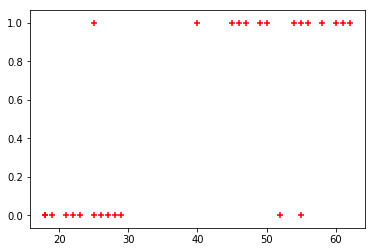

In [5]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [6]:
def simple_linear_regression(X,y):
    n = float(len(X))
    sum_x = X.sum()
    sum_y = y.sum()
    sum_xy = (X*y).sum()
    sum_xx = (X**2).sum()
    
    # formula for w0
    slope = (sum_xy - (sum_x*sum_y)/n)/(sum_xx - (sum_x*sum_x)/n)
    
    # formula for w1
    intercept = sum_y/n - slope*(sum_x/n)    
    return (round(intercept,15), round(slope,15))

In [8]:
# simple_linear_regression(x_train,y_train)
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.age, df.bought_insurance, test_size=0.1, random_state=42)

In [13]:
intercept, slope = simple_linear_regression(X_train,y_train)

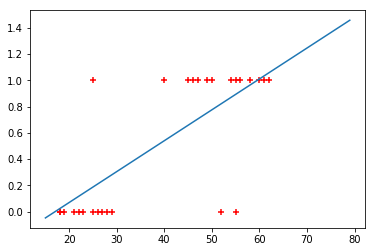

In [20]:
import numpy as np 

def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x) 
    plt.plot(x, y) 
    plt.scatter(df.age,df.bought_insurance,marker='+',color='red')
    plt.show()  

def my_formula(x):
    return slope*x+intercept

graph(my_formula, range(15, 80))

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()

In [56]:
X_train_reshaped = np.array(X_train.to_list()).reshape(-1,1)
X_test_reshaped = np.array(X_test.to_list()).reshape(-1,1)

In [66]:
model.fit(X_train_reshaped,y_train)

/home/jithin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
X_test_reshaped

array([[62],
       [29],
       [61]])

In [59]:
y_test_reshaped

array([[1],
       [0],
       [1]])

In [70]:
model.predict(X_test_reshaped)

array([1, 0, 1])

In [63]:
model.score(X_test_reshaped,y_test_reshaped)

1.0

In [64]:
model.predict_proba(X_test_reshaped)

array([[0.1793161 , 0.8206839 ],
       [0.53991637, 0.46008363],
       [0.18693522, 0.81306478]])

In [75]:
model.predict([[33]])

array([1])